Epoch 1/50 - Train Loss: 0.3265, Train Accuracy: 0.8471, Test Loss: 0.3180, Test Accuracy: 0.8543
Epoch 2/50 - Train Loss: 0.3265, Train Accuracy: 0.8471, Test Loss: 0.3180, Test Accuracy: 0.8543
Epoch 3/50 - Train Loss: 0.3265, Train Accuracy: 0.8471, Test Loss: 0.3180, Test Accuracy: 0.8543
Epoch 4/50 - Train Loss: 0.3265, Train Accuracy: 0.8471, Test Loss: 0.3180, Test Accuracy: 0.8543
Epoch 5/50 - Train Loss: 0.3265, Train Accuracy: 0.8471, Test Loss: 0.3180, Test Accuracy: 0.8543
Epoch 6/50 - Train Loss: 0.3265, Train Accuracy: 0.8471, Test Loss: 0.3180, Test Accuracy: 0.8543
Epoch 7/50 - Train Loss: 0.3265, Train Accuracy: 0.8471, Test Loss: 0.3180, Test Accuracy: 0.8543
Epoch 8/50 - Train Loss: 0.3265, Train Accuracy: 0.8471, Test Loss: 0.3180, Test Accuracy: 0.8543
Epoch 9/50 - Train Loss: 0.3265, Train Accuracy: 0.8471, Test Loss: 0.3180, Test Accuracy: 0.8543
Epoch 10/50 - Train Loss: 0.3265, Train Accuracy: 0.8471, Test Loss: 0.3180, Test Accuracy: 0.8543
Epoch 11/50 - Train

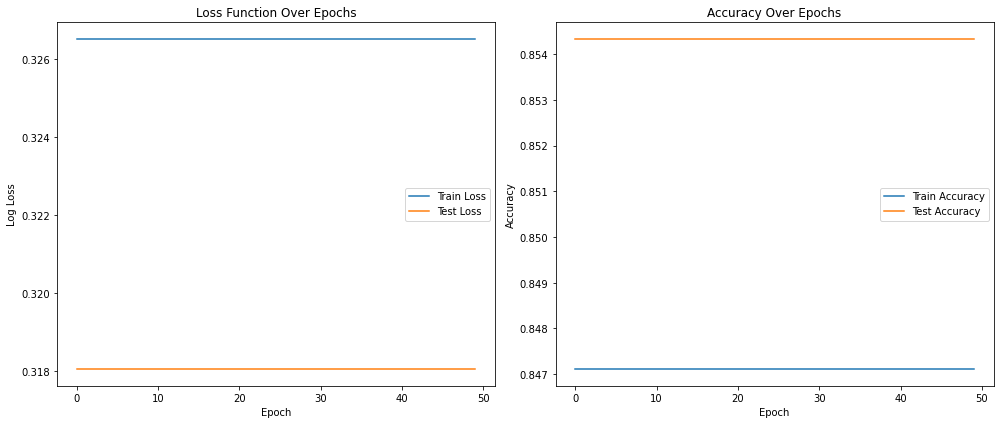

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss

# 1. Caricamento del dataset
train_data = pd.read_csv('dataset/train_data.csv')
test_data = pd.read_csv('dataset/test_data.csv')

# 2. Separare le feature dal target ('income')
X_train = train_data.drop('income', axis=1)
y_train = train_data['income']

X_test = test_data.drop('income', axis=1)
y_test = test_data['income']

# 3. Preprocessing: standardizzazione delle feature numeriche (facoltativo, utile per regressione)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Addestrare il modello di Logistic Regression
model = LogisticRegression(max_iter=1000, solver='lbfgs')

train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

epochs = 50  # Definire un numero di epoche per valutare l'andamento delle metriche

for epoch in range(epochs):
    model.fit(X_train_scaled, y_train)

    # 5. Calcolo delle predizioni per il training set
    y_train_pred_proba = model.predict_proba(X_train_scaled)
    y_train_pred = model.predict(X_train_scaled)

    # Calcolo della loss e dell'accuracy per il training set
    train_loss = log_loss(y_train, y_train_pred_proba)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    
    # 6. Calcolo delle predizioni per il test set
    y_test_pred_proba = model.predict_proba(X_test_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Calcolo della loss e dell'accuracy per il test set
    test_loss = log_loss(y_test, y_test_pred_proba)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Salvare i risultati
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    
    print(f"Epoch {epoch+1}/{epochs} - Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# 7. Visualizzazione dell'andamento della loss function
plt.figure(figsize=(14, 6))

# Plot della loss function
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.title('Loss Function Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.legend()

# Plot dell'accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.savefig('logistic_regression_performance.png')  # Salva il grafico come immagine
plt.show()
